<a href="https://colab.research.google.com/github/EnochYounceSAIC/colab/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [102]:
length = 3000
span = 100
#Fiber type: SMF-28
#current task: model EDFA noise and amplification for OOK
EDFA_noise = 4.7 #dB
EDFA_tot_power = 17 #dBm
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
#EDFA used EDFA 100s : https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_ID=10680
#because OOK, assuming single wavelength light, using 1550nm
lambda_light = 1550e-9
f_light = 3e8/lambda_light
#using max attenuation as a graph or standard deviation is not provided
attenuation = 0.17 #dB/km
power_initial = 3 #dBm

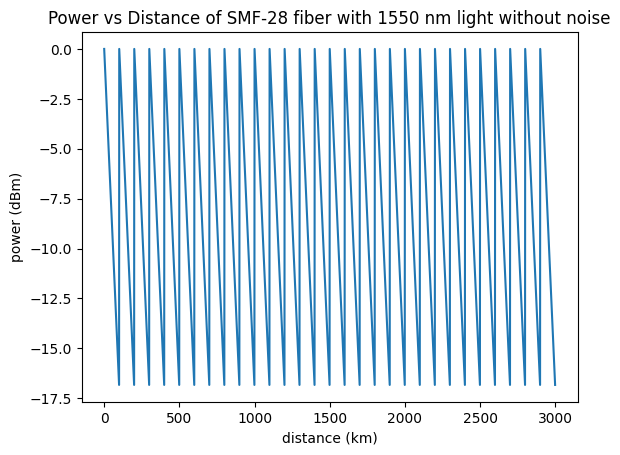

In [103]:
distance = np.arange(0,length,1)
power =  - attenuation * distance + EDFA_tot_power * (distance // span)
noise = 0
plt.plot(distance,power)
plt.xlabel('distance (km)')
plt.ylabel('power (dBm)')
plt.title('Power vs Distance of SMF-28 fiber with 1550 nm light without noise')
plt.show()

1.9952623149688795


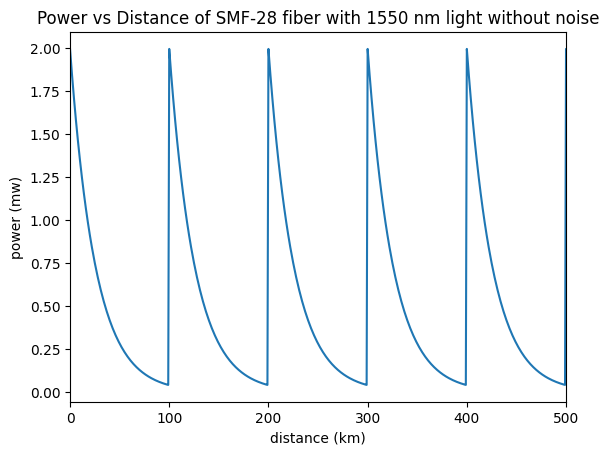

In [111]:
plt.plot(distance,10**(power/10)*10**(power_initial/10))
plt.xlabel('distance (km)')
plt.ylabel('power (mw)')
plt.xlim(0,500)

plt.title('Power vs Distance of SMF-28 fiber with 1550 nm light without noise')
plt.show()

1.0
521.83


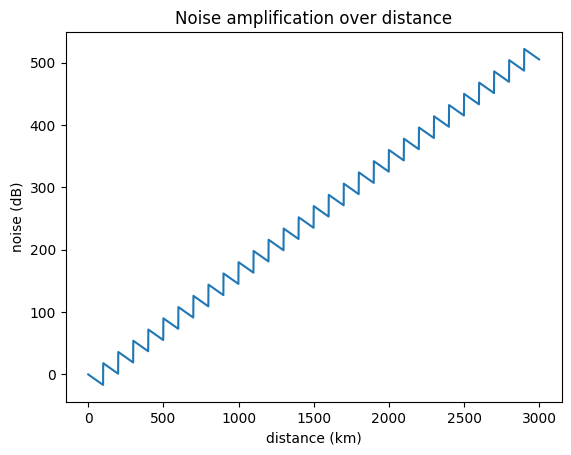

In [115]:
#noise calculations
planks_const = 6.626e-34 #J*s
bandwidth = 0.1*10**(-9) #0.1nm
power_ase = 10**(EDFA_noise*planks_const*f_light*(EDFA_tot_power-1)*bandwidth*0.1)
print(power_ase)
noise = (distance//span)*power_ase- (attenuation *(distance % span)) + EDFA_tot_power * (distance // span)
plt.plot(distance,noise)
plt.xlabel('distance (km)')
plt.title("Noise amplification over distance") #note that this is the amplification, not the actual power of the noise. initial noise must be considered to find total noise
plt.ylabel('noise (dB)')
print(noise[2901])
plt.show()